In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pickle
import matplotlib.pyplot as plt
import numpy as np
import laboratorio
import scipy.stats

# El problema de la mochila

## Introducción

A continuación se enuncia el clásico problema de optimización combinatorial conocido como el problema de la mochila (knapsack problem).

Sea un conjunto de $m$ elementos cada uno descrito por su masa $w_j$ y su valor $v_j$ y una mochila cuyo límite de capacidad es $C$. Asumiendo que el volumen y la forma de los objetos no importan, encuentre el subconjunto de objetos de mayor valor que puede ser llevado en la mochila. 

Sea el siguiente vector que representa el contenido de la mochila

$$
x = (z_1, z_2, \ldots, z_m)
$$

donde $z_i \in \{0, 1\}$ es igual a 1 si el elemento $i$ está en la mochila y 0 si no lo está

Se define entonces un espacio de posibilidades

$$
\Omega = \left \{x \in \{0, 1\}^m : \sum_{j=1}^m w_j z_j \leq C \right \}
$$

De donde queremos encontrar aquella configuración de elementos en la mochila que maximiza la utilidad

$$
U(x) = \sum_{j=1}^m v_j z_j
$$


## Actividad

Encuentre la solución al problema de la mochila utilizando el algoritmo de **Simulated Annealing** (SA), el cual es una versión del algoritmo de Metropolis donde la distribución de interés se formula como

$$
p(x) = \frac{1}{Z} \exp \left(\frac{U(x)}{T} \right) 
$$

donde $U(x)$ es la función de utilidad, $T$ es la temperatura y $Z = \sum_{x\in \Omega}  \exp \left(\frac{U(x)}{T} \right)$ es la evidencia o verosimilitud

En particular se pide que

- Estudie el algoritmo de SA implementado en `laboratorio.simulated_annealing`. Destaque las diferencias con el algoritmo de Metropolis visto en clases
- Implemente la función `laboratorio.knapsack_utility` según lo indicado en su docstring
- Implemente la función `laboratorio.knapsack_is_valid` según lo indicado en su docstring
- Implemente la función `laboratorio.knapsack_propose` según lo indicado en su docstring
- Implemente la función `laboratorio.knapsack_acceptance_criterion` según lo indicado en su docstring

En lo que sigue considere el problema `knapsack1.pkl`

* R: Una notable diferencia es la validación que se hace con el parámetro T.

In [2]:
with open("data/knapsack1.pkl", "rb") as f:
    config = pickle.load(f)

print(f"Las llaves disponibles son {config.keys()}")
print(f"Espacio con {len(config['v'])} elementos posibles y mochila con capacidad {config['C']}")

Las llaves disponibles son dict_keys(['C', 'v', 'w'])
Espacio con 10 elementos posibles y mochila con capacidad 2586


- Ejecute 10 veces la función `laboratorio.knapsack_SA` con un tiempo de mezcla de `200` y una temperatura de `1000`. Haga un gráfico que muestre las 10 secuencias de  utilidades históricas obtenidas. Imprima el promedio y la desviación estándar de las mejores configuraciones obtenida. 

[1. 0. 0. 0. 1. 1. 1. 0. 1. 1.] 3760.0


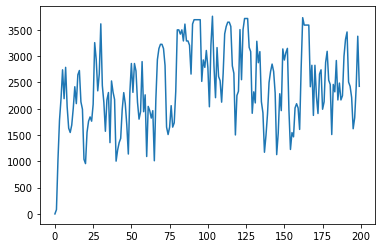

In [169]:
utility_history, best_x, best_U = laboratorio.simulated_annealing(200, config, T=1e+3)

fig, ax = plt.subplots()

ax.plot(utility_history)

print(best_x, best_U)

- Repita lo anterior con una temperatura de `1`. 


[0. 1. 1. 1. 1. 1. 1. 1. 1. 0.] 3929.0


/home/andres/Escritorio/SIMULION/student-info274-lab3-simulion-main/laboratorio.py:71: RuntimeWarning: overflow encountered in exp
  z = np.exp(utilidad/T)


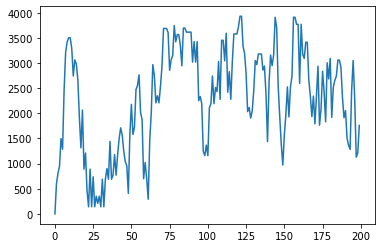

In [170]:
utility_history, best_x, best_U = laboratorio.simulated_annealing(200, config, T=1)

fig, ax = plt.subplots()

ax.plot(utility_history)

print(best_x, best_U)

- Compare, discuta y responda
    - ¿Cuál temperatura privilegia más la exploración? 
    - ¿Con cuál temperatura se obtienen soluciones mejores en el tiempo de mezcla considerado? 

In [174]:
#utility_history, best_x, best_U = laboratorio.simulated_annealing(200, config, T=-1e+3)

#fig, ax = plt.subplots()

#ax.plot(utility_history)

#print(best_x, best_U)

* Solo se ven variaciones para la validación, si la termperatura adquiere valores negativos.
*